# Word Completion using LSTM

In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import tkinter as tk
from tkinter import StringVar
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import pickle


# Assuming dataset is a CSV file or text file
dataset_path = '/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/Shakespeare_data.csv'
df = pd.read_csv(dataset_path)

# Preprocess the text: cleaning, removing punctuation, converting to lowercase
text_data = df['PlayerLine'].str.lower().str.replace('[^\w\s]', '', regex=True)

# Tokenizing the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)

total_words = len(tokenizer.word_index) + 1
print("total_words: ",total_words)
input_sequences = []

# Creating sequences of words
for line in text_data:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Padding sequences to ensure uniform length
max_sequence_len = max([len(x) for x in input_sequences])
max_sequence_len = 50  # Example limit, adjust as needed

print("max_sequence_len: ",max_sequence_len)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Features and labels
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)




model = Sequential()
model.add(Embedding(total_words, 50, input_length=max_sequence_len - 1))
model.add(LSTM(64))  # Reduce LSTM units to 64 or lower
model.add(Dropout(0.2))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# Train the model
#history = model.fit(X, y, epochs=20, verbose=1)
history = model.fit(X, y, batch_size=32, epochs=20)  # Try reducing to 32 or even 16



total_words:  27382
max_sequence_len:  50
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 49, 50)            1369100   
                                                                 
 lstm_1 (LSTM)               (None, 64)                29440     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 27382)             1779830   
                                                                 
Total params: 3178370 (12.12 MB)
Trainable params: 3178370 (12.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
21977/21977 [==============================] - 704s 32ms/step - loss: 6.6217 - accuracy: 0.07

In [ ]:

# Save the trained model
model.save('/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/lstm_model_updated.h5')
print("Model saved as 'lstm_model.h5'")

# Save the tokenizer
with open('/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/tokenizer_updated.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print("Tokenizer saved as 'tokenizer.pickle'")





```
# This is formatted as code
```

# Q2 model chunk wise training

In [ ]:

# Model import compile and prediction function

import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle

# Step 1: Load the dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/Shakespeare_data.csv'  # Change this to your actual CSV file path
df = pd.read_csv(dataset_path)

# Step 2: Preprocess the text data
text_data = df['PlayerLine'].str.lower().str.replace('[^\w\s]', '', regex=True)

text_data = text_data[:10000]


# Step 3: Create the tokenizer and fit on the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)

# Step 4: Save the tokenizer
with open('/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Step 5: Load the model (if already trained and saved)
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/lstm_model.h5')

# Step 6: Load the tokenizer from file (if you haven't done so)
with open('/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


# Define max_sequence_len (use the same value you used during training)
max_sequence_len = 10  # Adjust this based on your training setup

# Step 7: Function to predict the next words
def predict_next_words(model, tokenizer, text, max_sequence_len, num_words=3):
    output = []

    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=-1)
        predicted_word = tokenizer.index_word[predicted_word_index[0]]
        output.append(predicted_word)
        text += ' ' + predicted_word

    return ' '.join(output)

# Step 8: Example usage
partial_sentence = "this"
predicted_words = predict_next_words(loaded_model, tokenizer, partial_sentence, max_sequence_len, num_words=3)
completed_sentence = f"{partial_sentence} {predicted_words}"
print(completed_sentence)




this is the strangest


In [ ]:


# Step 4: Save the tokenizer
with open('/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/Shakespeare_data.csv/lstm_model.h5')

Hello


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
import pickle
import os


def preprocess_text(dataset_path, chunk_size=10000):
    # Load dataset
    df = pd.read_csv(dataset_path)

    # Preprocess the text: cleaning, removing punctuation, converting to lowercase
    text_data = df['PlayerLine'].str.lower().str.replace('[^\w\s]', '', regex=True)

    # Limit the text data to the specified chunk size
    return text_data[chunk_size:chunk_size+chunk_size]

def create_sequences(text_data, max_sequence_len):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text_data)

    total_words = len(tokenizer.word_index) + 1
    input_sequences = []

    # Creating sequences of words
    for line in text_data:
        token_list = tokenizer.texts_to_sequences([line])[0]
        for i in range(1, len(token_list)):
            n_gram_sequence = token_list[:i+1]
            input_sequences.append(n_gram_sequence)

    # Padding sequences to ensure uniform length
    input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

    # Features and labels
    X = input_sequences[:, :-1]
    y = input_sequences[:, -1]
    y = tf.keras.utils.to_categorical(y, num_classes=total_words)

    return X, y, tokenizer, total_words

def build_model(total_words, max_sequence_len):
    model = Sequential()
    model.add(Embedding(total_words, 50, input_length=max_sequence_len - 1))
    model.add(LSTM(64))
    model.add(Dropout(0.2))
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def train_model(dataset_path, chunk_size=10000, max_sequence_len=50, model_path='/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/lstm_model.h5', tokenizer_path='/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/tokenizer.pickle'):
    # Load the existing tokenizer
    with open(tokenizer_path, 'rb') as handle:
        tokenizer = pickle.load(handle)

    # Load or initialize the model
    if os.path.exists(model_path):
        model = load_model(model_path)
    else:
        total_words = len(tokenizer.word_index) + 1
        model = build_model(total_words, max_sequence_len)

    # Preprocess text data
    text_data = preprocess_text(dataset_path, chunk_size)

    # Create input sequences
    X, y, _, total_words = create_sequences(text_data, max_sequence_len)

    # Train the model
    history = model.fit(X, y, batch_size=32, epochs=20)

    # Save the model and tokenizer
    model.save(model_path)
    with open(tokenizer_path, 'wb') as handle:
        pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

    print("Model updated and saved successfully.")

# def train_model(dataset_path, chunk_size=10000, max_sequence_len=50, model_path='lstm_model.h5', tokenizer_path='tokenizer.pickle'):
#     # Preprocess text data
#     text_data = preprocess_text(dataset_path, chunk_size)

#     # Create input sequences
#     X, y, tokenizer, total_words = create_sequences(text_data, max_sequence_len)

#     # Build the model
#     model = build_model(total_words, max_sequence_len)

#     # Train the model
#     history = model.fit(X, y, batch_size=32, epochs=20)

#     # Save the model and tokenizer
#     model.save(model_path)
#     with open(tokenizer_path, 'wb') as handle:
#         pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

#     print("Model and tokenizer saved successfully.")

# Example usage
dataset_path = '/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/Shakespeare_data.csv'
train_model(dataset_path, chunk_size=10000)


Epoch 1/20


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 7476), output.shape=(None, 7870)

In [5]:
# Model import compile and prediction function

import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import pickle

# Step 1: Load the dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/Shakespeare_data.csv'  # Change this to your actual CSV file path
df = pd.read_csv(dataset_path)

# Step 2: Preprocess the text data
text_data = df['PlayerLine'].str.lower().str.replace('[^\w\s]', '', regex=True)

text_data = text_data[:10000]


# Step 3: Create the tokenizer and fit on the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)

# Step 4: Save the tokenizer
with open('/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Step 5: Load the model (if already trained and saved)
loaded_model = load_model('/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/lstm_model.h5')

# Step 6: Load the tokenizer from file (if you haven't done so)
with open('/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)


# Define max_sequence_len (use the same value you used during training)
max_sequence_len = 10  # Adjust this based on your training setup

# Step 7: Function to predict the next words
def predict_next_words(model, tokenizer, text, max_sequence_len, num_words=3):
    output = []

    for _ in range(num_words):
        token_list = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word_index = np.argmax(predicted, axis=-1)
        predicted_word = tokenizer.index_word[predicted_word_index[0]]
        output.append(predicted_word)
        text += ' ' + predicted_word

    return ' '.join(output)

# Step 8: Example usage
partial_sentence = "to be a"
predicted_words = predict_next_words(loaded_model, tokenizer, partial_sentence, max_sequence_len, num_words=3)
completed_sentence = f"{partial_sentence} {predicted_words}"
print(completed_sentence)



to be a truant to the


In [17]:
import gradio as gr

# Example function for word prediction (replace with your LSTM prediction logic)
def predict_next_word(input_text):
    next_word = predict_next_words(loaded_model, tokenizer, input_text, max_sequence_len, num_words=3)
    return next_word

# Create a Gradio interface
iface = gr.Interface(
    fn=predict_next_word,
    inputs=gr.Textbox(label="Enter a partial sentence"),
    outputs=gr.Textbox(label="Next Word Suggestion")
)

# Launch the interface
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://56304c4cbc343ea1ae.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [3]:
import tensorflow as tf
import numpy as np
import cv2


# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/GenAI/A1/Data/Q2_data/signature_recognition_model.h5')

def preprocess_image(image_path, target_size=(558, 1135)):
    """
    Preprocesses the image to be compatible with the model's input.
    """
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add a batch dimension (1, height, width, channels)
    img_array = img_array / 255.0  # Normalize pixel values to [0, 1]
    return img_array


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
import tkinter as tk
from tkinter import StringVar

def on_key_press(event):
    try:
        text = entry.get()
        print("User input:", text)
        if text:
            next_word = predict_next_word(model, tokenizer, text, max_sequence_len)
            print("Next word predicted:", next_word)
            prediction_label.config(text="Next Word Suggestion: " + next_word)
    except Exception as e:
        print(f"Error occurred: {e}")

root = tk.Tk()
root.title("Word Completion using LSTM")

entry = tk.Entry(root, width=50)
entry.pack(pady=20)
entry.bind("<KeyRelease>", on_key_press)

prediction_label = tk.Label(root, text="Next Word Suggestion: ", font=("Helvetica", 12))
prediction_label.pack(pady=20)

root.mainloop()


TclError: no display name and no $DISPLAY environment variable

Mounted at /content/drive


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Predicted person: person_83


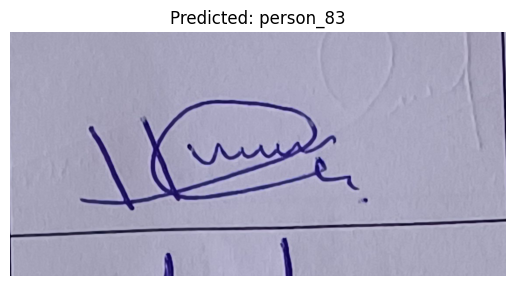

In [4]:

# Example: Preprocess the test image
test_image_path = '/content/drive/MyDrive/Colab Notebooks/GenAI/A1/signatures_extracted/person_1/test/signature_3.png'
preprocessed_image = preprocess_image(test_image_path)



# Predict the class of the test image
predictions = model.predict(preprocessed_image)
predicted_class = np.argmax(predictions, axis=1)
# Assuming you have a list of class names used during training
class_names = []
for i in range(1,190):
  class_names.append(f'person_{i}')

predicted_person = class_names[predicted_class[0]]

print(f"Predicted person: {predicted_person}")

import matplotlib.pyplot as plt

def display_image_with_prediction(image_path, predicted_person):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display in matplotlib

    plt.imshow(img_rgb)
    plt.title(f"Predicted: {predicted_person}")
    plt.axis('off')  # Hide axis
    plt.show()

# Display the image with prediction
display_image_with_prediction(test_image_path, predicted_person)

